In [3]:
!unzip archive\ \(1\).zip

Archive:  archive (1).zip
replace twitter_training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: twitter_training.csv    
replace twitter_validation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: twitter_validation.csv  


In [4]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# load the dataset
df = pd.read_csv('twitter_training.csv')
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
# load dataset
df1 = pd.read_csv('twitter_validation.csv')
df1

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [7]:
# check column names
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [8]:
# change column names
df.columns = ['tweet_id', 'entity', 'sentiment', 'tweet_content']
df

,tweet_id,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [9]:
# check the shape of the data
df.shape

(74681, 4)

In [10]:
df1.columns = ['tweet_id', 'entity', 'sentiment', 'tweet_content']
df1

,tweet_id,entity,sentiment,tweet_content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [11]:
df1.isna().sum()

,0
tweet_id,0
entity,0
sentiment,0
tweet_content,0


In [12]:
# check for null values
df.isna().sum()

,0
tweet_id,0
entity,0
sentiment,0
tweet_content,686


In [13]:
# drop null values
df.dropna(inplace=True)

In [14]:
df.isna().sum()

,0
tweet_id,0
entity,0
sentiment,0
tweet_content,0


In [15]:
# check for duplicates
df.duplicated().sum()

2340

In [16]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
# clean text and remove stopwords
nltk.download('punkt_tab')
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

df['cleaned_text'] = df['tweet_content'].apply(clean_text)  # Apply cleaning function


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [19]:
df.head()

,tweet_id,entity,sentiment,tweet_content,cleaned_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming border kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderland kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderland murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderland murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderland murder


In [20]:
# Generate word clouds for each sentiment
def generate_wordcloud(sentiment):
    text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_text'])
    # Check if text is empty and handle it
    if not text.strip():  # Check if text is empty or contains only whitespace
        print(f"No text available for {sentiment} sentiment. Wordcloud not generated.")
        return  # Exit the function early to avoid the error

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {sentiment} Sentiment')
    plt.show()

generate_wordcloud('positive')
generate_wordcloud('neutral')
generate_wordcloud('negative')

No text available for positive sentiment. Wordcloud not generated.
No text available for neutral sentiment. Wordcloud not generated.
No text available for negative sentiment. Wordcloud not generated.


In [21]:
#Clean and extract keywords
def extract_keywords(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)
    # Modify tokens within the function scope
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Return the modified tokens as keywords
    return tokens

# Add a column for keywords
df['keywords'] = df['tweet_content'].apply(extract_keywords)

# Apply cleaning function.
df['cleaned_text'] = df['tweet_content'].apply(clean_text) # Assuming clean_text function is defined

In [22]:
df.head()

,tweet_id,entity,sentiment,tweet_content,cleaned_text,keywords
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming border kill,"[coming, border, kill]"
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderland kill,"[im, getting, borderland, kill]"
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderland murder,"[im, coming, borderland, murder]"
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderland murder,"[im, getting, borderland, murder]"
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderland murder,"[im, getting, borderland, murder]"


In [23]:
# check the count for each entity
df['entity'].value_counts()

,count
entity,
TomClancysRainbowSix,2328
Verizon,2319
MaddenNFL,2315
CallOfDuty,2314
Microsoft,2304
WorldOfCraft,2300
NBA2K,2299
LeagueOfLegends,2296
TomClancysGhostRecon,2291


In [24]:
# count for each sentiment
df['sentiment'].value_counts()

,count
sentiment,
Negative,21698
Positive,19712
Neutral,17708
Irrelevant,12537


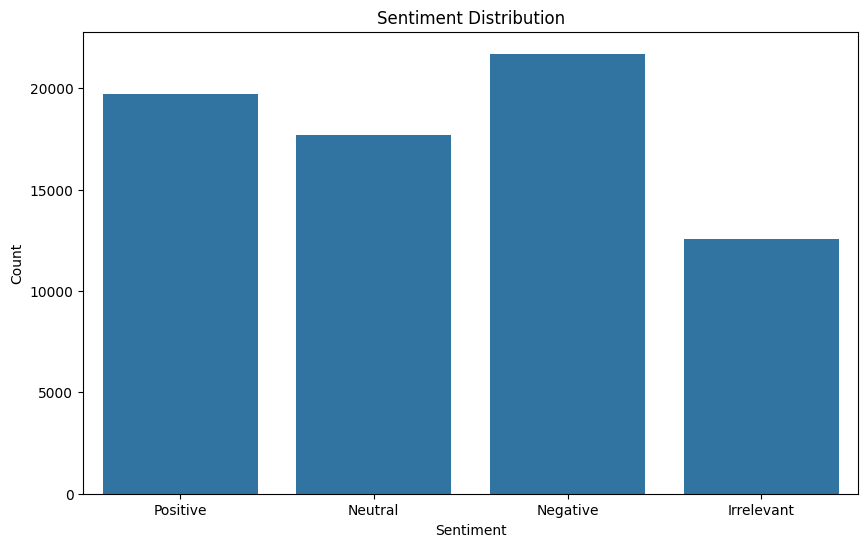

In [25]:
# visualize the distribution of each sentiment
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [26]:
# Group by entity and sentiment, then count occurrences
sentiment_counts = df.groupby(['entity', 'sentiment']).size().unstack(fill_value=0)
print(sentiment_counts)

sentiment                          Irrelevant  Negative  Neutral  Positive
entity                                                                    
Amazon                                    185       565     1197       302
ApexLegends                               185       574      913       606
AssassinsCreed                            256       365      153      1382
Battlefield                               907       445      342       561
Borderlands                               238       415      581       971
CS-GO                                     620       335      523       717
CallOfDuty                                660       861      367       426
CallOfDutyBlackopsColdWar                 545       540      340       817
Cyberpunk2077                             457       360      456       902
Dota2                                     401       705      579       540
FIFA                                      538      1127      100       473
Facebook                 

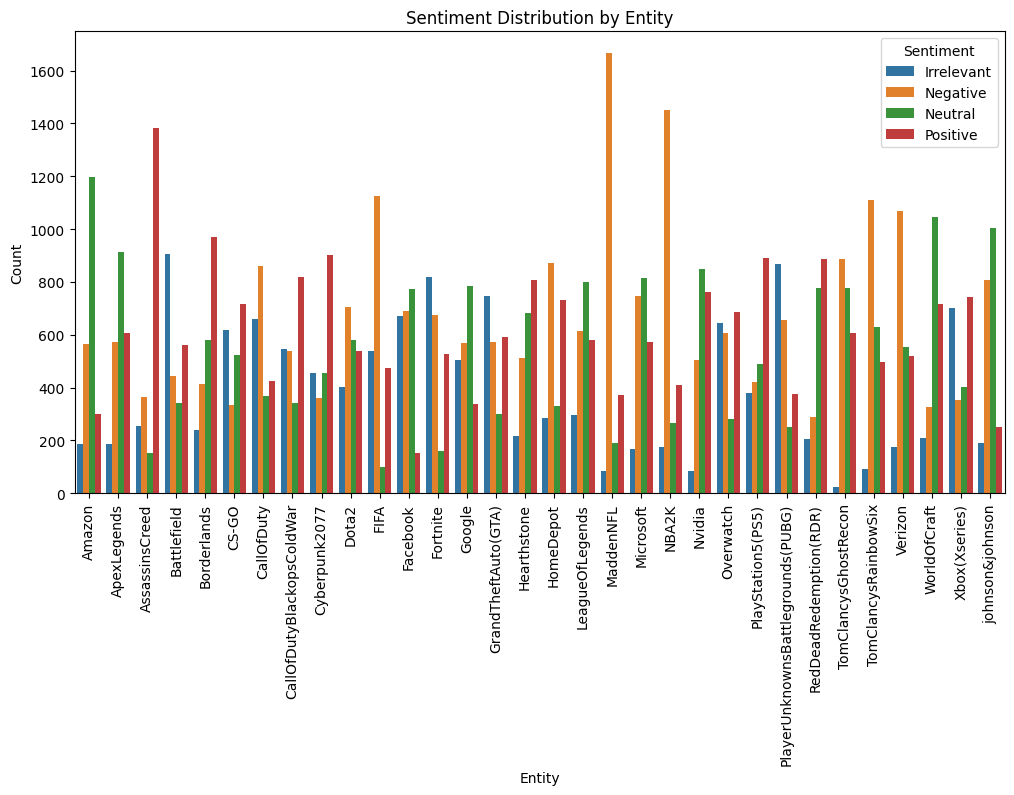

In [27]:
# Reshape the data for Seaborn
sentiment_counts_reset = sentiment_counts.reset_index()
sentiment_counts_melted = sentiment_counts_reset.melt(id_vars='entity', var_name='sentiment', value_name='count')

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(data=sentiment_counts_melted, x='entity', y='count', hue='sentiment')
plt.title('Sentiment Distribution by Entity')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.show()


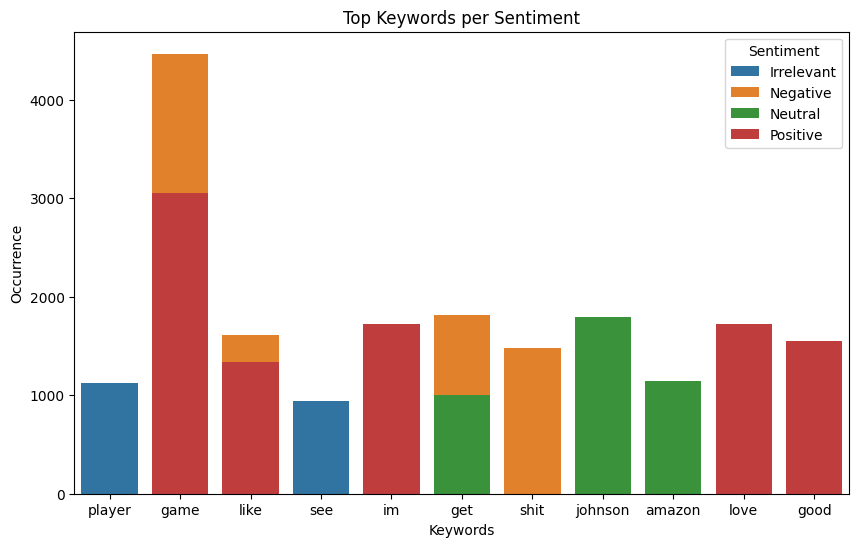

In [28]:
# Flatten keywords and group by sentiment
sentiment_keywords = df.explode('keywords').groupby('sentiment')['keywords'].value_counts().unstack(fill_value=0)

# Plot top keywords per sentiment
plt.figure(figsize=(10, 6))
for sentiment in sentiment_keywords.index:
    top_keywords = sentiment_keywords.loc[sentiment].nlargest(5)  # Top 5 keywords per sentiment
    sns.barplot(x=top_keywords.index, y=top_keywords.values, label=sentiment)
plt.title('Top Keywords per Sentiment')
plt.xlabel('Keywords')
plt.ylabel('Occurrence')
plt.legend(title='Sentiment')
plt.show()

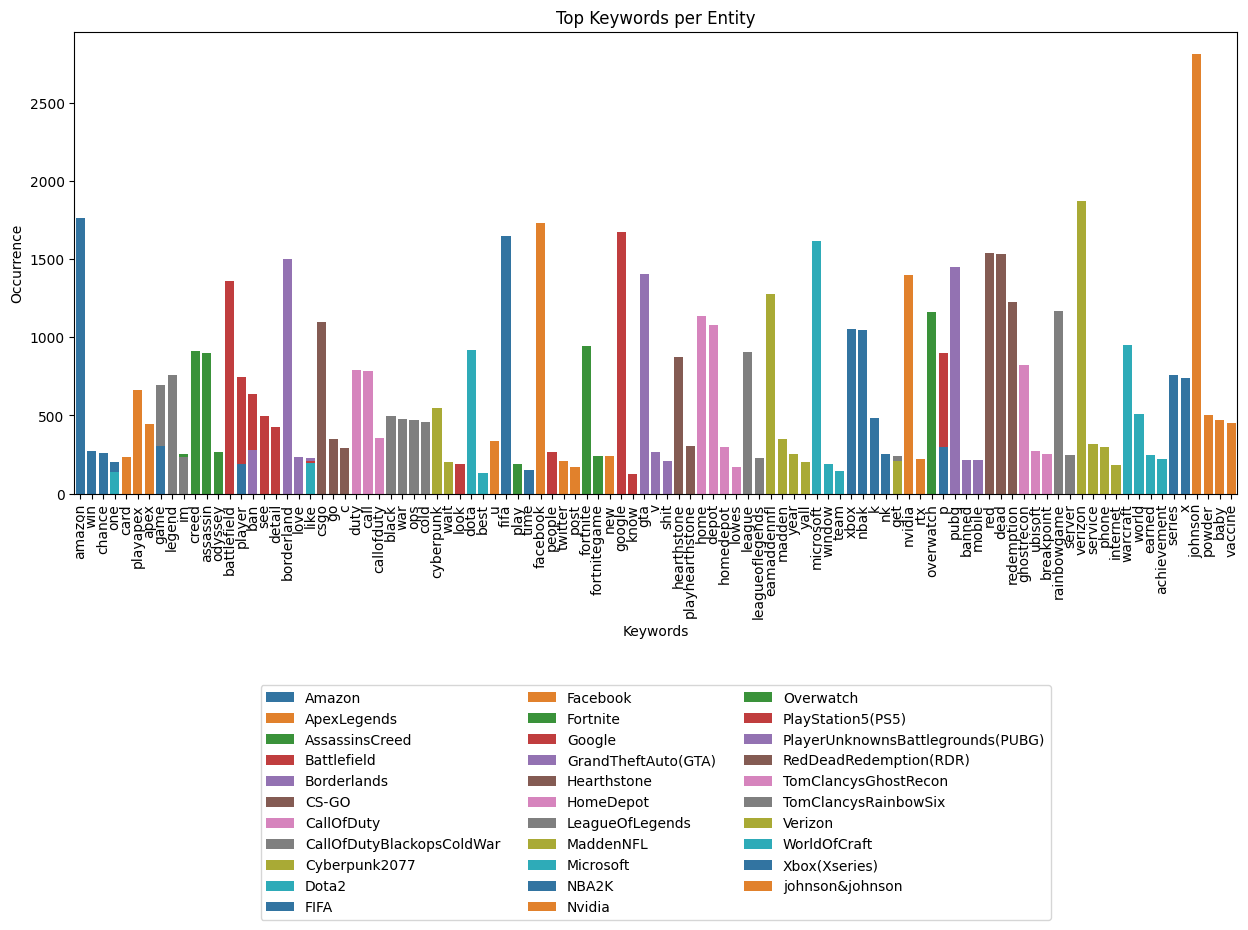

In [34]:
# Flatten keywords and group by entity
entity_keywords = df.explode('keywords').groupby('entity')['keywords'].value_counts().unstack(fill_value=0)

# Plot top keywords per entity
plt.figure(figsize=(15, 6))
for entity in entity_keywords.index:
    top_keywords = entity_keywords.loc[entity].nlargest(5)  # Top 5 keywords per entity
    sns.barplot(x=top_keywords.index, y=top_keywords.values, label=entity)
plt.title('Top Keywords per Entity')
plt.xlabel('Keywords')
plt.xticks(rotation=90)
plt.ylabel('Occurrence')

# Move the legend below the plot
sns.move_legend(plt.gca(), "upper center", bbox_to_anchor=(.5, -0.4), ncol=3)

plt.show()